In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

env = gym.make("CartPole-v0")
env.reset()
print("initialised")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
initialised


(4, 4)
0
1
2
3
4
5
6
7
8
9
10
0
1
2
NUM RESETS: 93
Average Reward per epoch: 32.086021505376344
range(0, 300000)
(300000, 4)
Phi


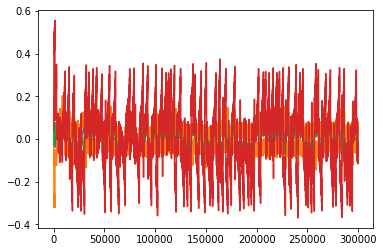

Pred phi


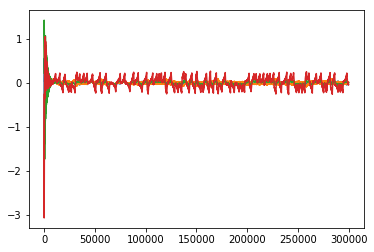

ds


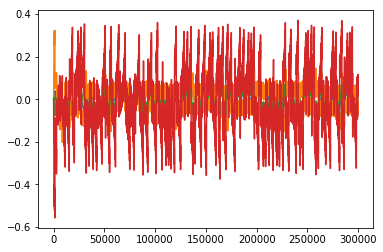

A1


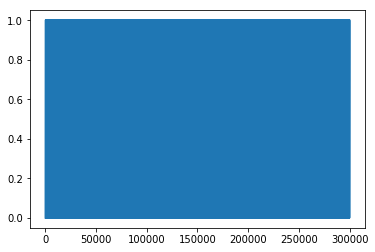

A2


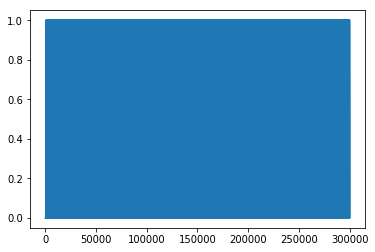

diffs


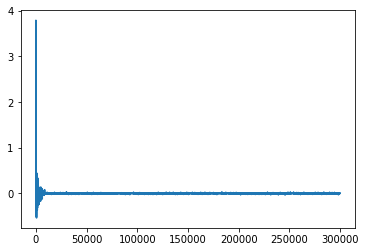

ez1


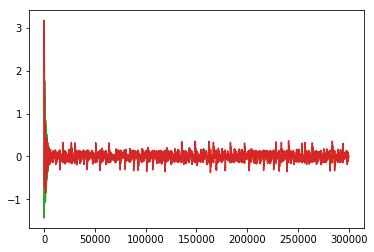

ez2


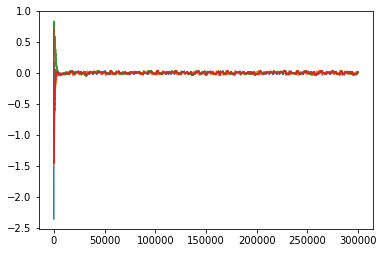

ez3


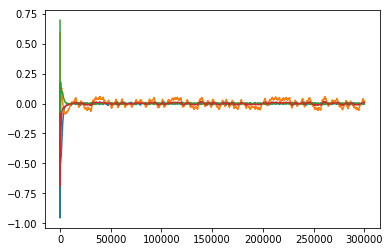

mu1


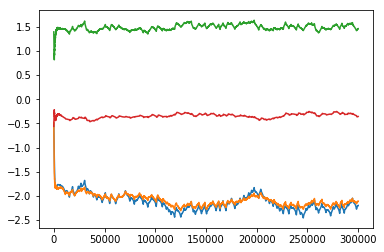

mu2


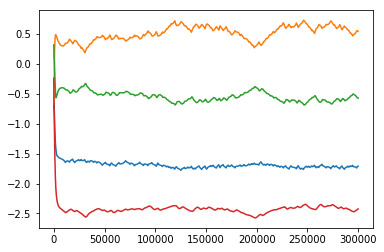

mu3


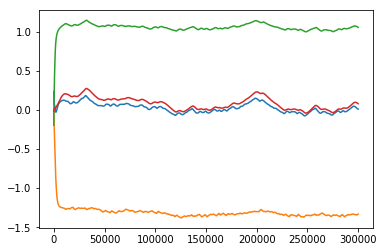

w0


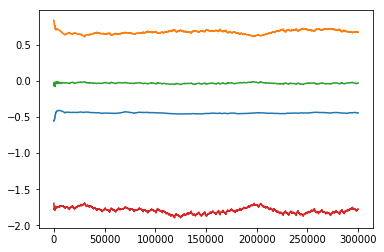

w1


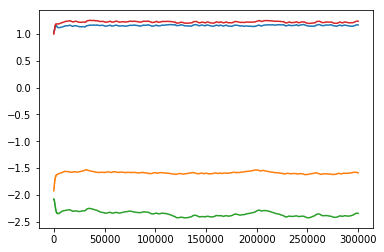

w2


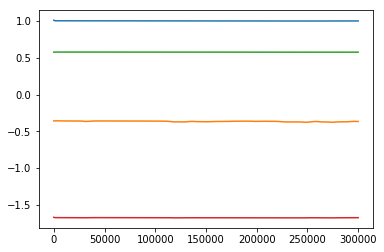

wa1


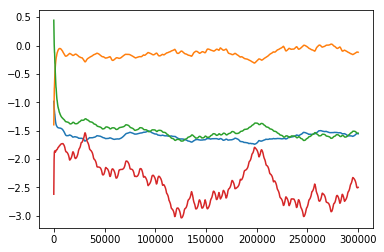

wa2


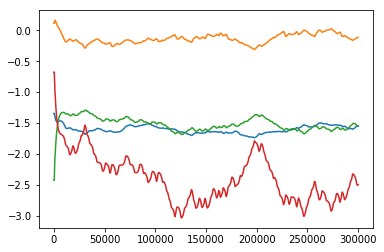

mu1grads


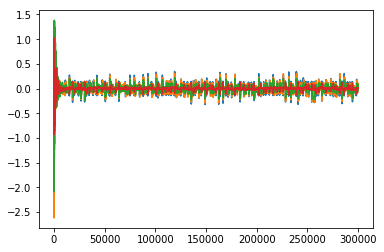

diffs1


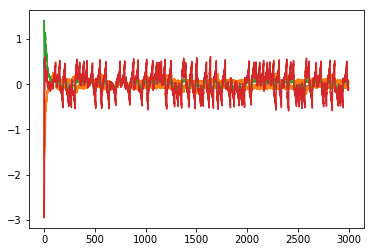

diffs2


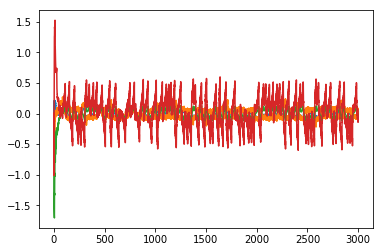

In [32]:

epochs = 3000
inf_num = 100

def reshapes(l, val):
    for i, e in enumerate(l):
        print(i)
        l[i] = np.reshape(np.array(e), (len(e), val))
    return l

def reshape_sum_weights(l):
    for i, e in enumerate(l):
        l[i] = np.array(np.sum(e, axis=2))
    return l

def sum_of_squares(l):
    tot = 0
    for e in l:
        tot += np.sum(np.square(e))
    return tot

d1 = 4
d2 = 4

phi = [np.reshape(np.array(env.reset()), (4,1))]
mu1 = [np.random.normal(size=[d1,1])]
mu2 = [np.random.normal(size=[d2,1])]
mu3 = [np.random.normal(size=[d2,1])]
prevObs = phi[0]

ez1 = [np.random.normal(size=[4,1])]
ez2 = [np.random.normal(size=[d1,1])]
ez3 = [np.random.normal(size=[d2,1])]



p1 = 0.1
p2 = 0.1
p3 = 0.1

w0 = [np.random.normal(size=[4,d1])]
w1 = [np.random.normal(size=[d1,d2])]
w2 = [np.random.normal(size=[d2,d2])]



print(w0[0].shape)

wa1 = [np.random.normal(size=[4,1])]
wa2 = [np.random.normal(size=[4,1])]

a1 = [0]
a2 = [0]
rewards = []
rewards_per_epoch = []
actions = []
diffs1 = [np.reshape(np.array([0,0,0,0]), (4,1))]
diffs2 = [np.reshape(np.array([0,0,0,0]), (4,1))]

prior = np.reshape(np.array([0,0,0,0]), (4,1))
num_resets = 0
diffs =[0]
preds = [np.random.normal(size=[4,1])]
learning_rate = 0.001
ds = [prior]
mu1grads = [np.reshape(np.array([0,0,0,0]), (4,1))]

for i in range(1,epochs * inf_num):
   !!
    if i % inf_num == 0 or i == 1:
        #print("Stepping environment!")
        pred = np.dot(w0[i-1], mu1[i-1])
        diffa01 = prior - (pred + wa1[i-1])
        diffa02 = prior - (pred + wa2[i-1])
        diff = np.sum(np.abs(diffa01)) - np.sum(np.abs(diffa02))
        #print(diff)
        if diff >=0:
            # a1 is best
            action = 0
            a1.append(1)
            a2.append(0)
        else:
            action = 1
            a1.append(0)
            a2.append(1)
       
        #action = 1
        #a1.append(0)
        #a2.append(0)
        #print(str(action) + "  " + str(np.sum(diffa01)) + "   " + str(np.sum(diffa11)))
        o, r, done, info = env.step(action)
        rewards.append(r)
        env.render()
        o = np.reshape(np.array(o), (4,1)) / 3.
        phi.append(o)
        prevObs = o
        diffs.append(diff)
        diffs1.append(o - diffa01)
        diffs2.append(o - diffa02)

        
        if done:
            #prior = np.reshape(np.array(env.reset()), (4,1))
            env.reset()
            prior = np.reshape(np.array([0,0,0,0]), (4,1))
            num_resets +=1
            rewards_per_epoch.append(np.sum(rewards))
            rewards = []
    else:
        #print(phi[i-1])
        phi.append(phi[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])
        diffs.append(diffs[i-1])
        
    """print(i)
    print(w0[i-1].shape)
    print(ez1[i].shape)
    print(ez2[i].shape)
    print(mu1[i-1].shape)
    print(mu2[i-1].shape)
    print(w1[i-1].shape)
    print(ez2[i-1].shape)
    print(ez3[i].shape)"""
    ez1.append(phi[i] - (np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i])))
    ez2.append(mu1[i-1] - np.dot(w1[i-1], mu2[i-1]))
    ez3.append(mu2[i-1] - np.dot(w2[i-1], mu3[i-1]))
    

    mu1grad = np.dot(w0[i-1].T, ez1[i]) + ez2[i]
    mu2grad = np.dot(w1[i-1].T, ez2[i]) + ez3[i]
    mu3grad = np.dot(w2[i-1].T, ez3[i])
    mu1grads.append(mu1grad)
    
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    mu3.append(mu3[i-1] + (learning_rate * mu3grad))
    
    #np.dot(wz10[i-1].T, ez00[i]) + np.dot(ww11[i-1].T, ew11[i]) + ez10[i]
    #mu11grad = np.dot(wz11[i-1].T, ez01[i]) + np.dot(ww12[i-1].T, ew12[i]) + ew11[i] + ez11[i]
    
    d = prior - o
    ds.append(d)
    pred = np.dot(w0[i-1], mu1[i-1])
    diffa01 = prior - (pred + wa1[i-1])
    diffa02 = prior - (pred + wa2[i-1])
    wa1.append(wa1[i-1] + (learning_rate * ((ez1[i] * a1[i]) + (d * a1[i]))))
    wa2.append(wa2[i-1] + (learning_rate * ((ez1[i] * a2[i]) + (d * a2[i]))))
    
    if i % inf_num == 0:
        # update weights - 
        w0.append(w0[i-1] + (10* learning_rate * np.dot(ez1[i], mu1[i].T))) 
        w1.append(w1[i-1] + (10 * learning_rate * np.dot(ez2[i], mu2[i].T)))
        w2.append(w2[i-1] + (10 * learning_rate * np.dot(ez3[i], mu3[i].T)))
        
    else:
        w0.append(w0[i-1])
        w1.append(w1[i-1])
        w2.append(w2[i-1])
        
        
    preds.append(np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]))
    
    
phi, ez1, ez2, mu1, wa1, wa2, preds,ds,mu1grads, diffs1, diffs2 = reshapes([phi, ez1, ez2, mu1,wa1, wa2, preds,ds, mu1grads, diffs1, diffs2],d1)
ez3, mu2, mu3 = reshapes([ez3,mu2,mu3], d2)
w0, w1, w2 = reshape_sum_weights([w0, w1, w2])

print("NUM RESETS: " + str(num_resets))
print("Average Reward per epoch: " + str(np.mean(rewards_per_epoch)))
n  = range(epochs * inf_num )
print(n)
print(phi.shape)
print("Phi")
plt.plot(n, phi)
plt.show()
print("Pred phi")
plt.plot(n, preds)
plt.show()
print("ds")
plt.plot(n, ds)
plt.show()
print("A1")
plt.plot(n, a1)
plt.show()
print("A2")
plt.plot(n, a2)
plt.show()
print("diffs")
plt.plot(n, diffs)
plt.show()
print("ez1")
plt.plot(n, ez1)
plt.show()
print("ez2")
plt.plot(n, ez2)
plt.show()
print("ez3")
plt.plot(n, ez3)
plt.show()
print("mu1")
plt.plot(n, mu1)
plt.show()
print("mu2")
plt.plot(n, mu2)
plt.show()
print("mu3")
plt.plot(n, mu3)
plt.show()
print("w0")
plt.plot(n, w0)
plt.show()
print("w1")
plt.plot(n, w1)
plt.show()
print("w2")
plt.plot(n, w2)
plt.show()
print("wa1")
plt.plot(n, wa1)
plt.show()
print("wa2")
plt.plot(n, wa2)
plt.show()
print("mu1grads")
plt.plot(n, mu1grads)
plt.show()
print("diffs1")
#
plt.plot(diffs1)
plt.show()
print("diffs2")
plt.plot(diffs2)
plt.show()

(4, 20)
0
1
2
3
4
5
6
7
8
9
10
0
1
2
NUM RESETS: 9
Average Reward per epoch: 91.44444444444444
range(0, 100000)
(100000, 4)
Phi


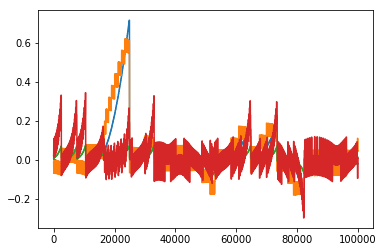

Pred phi


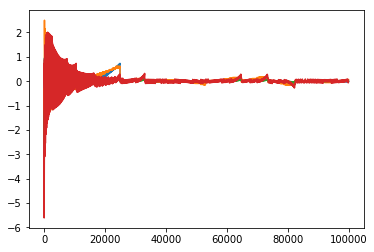

ds


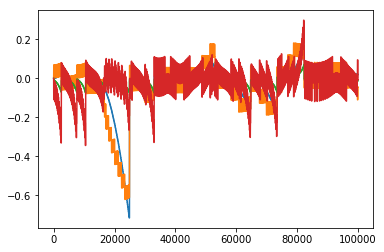

A1


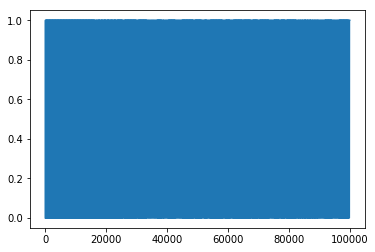

A2


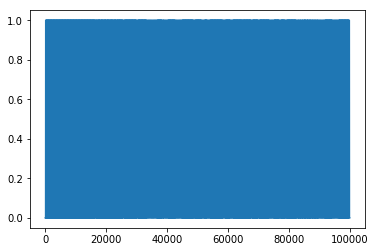

diffs


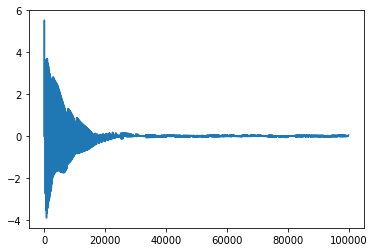

ez1


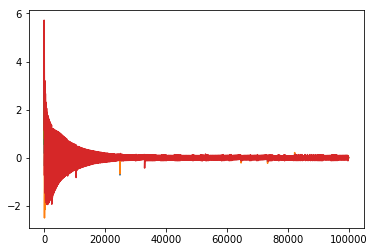

ez2


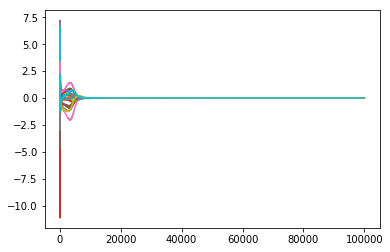

ez3


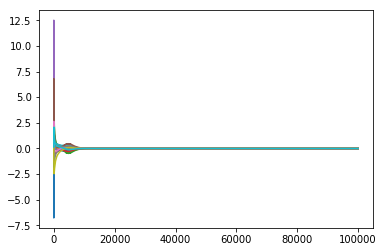

mu1


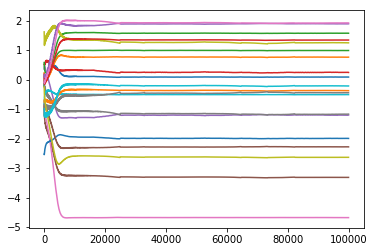

mu2


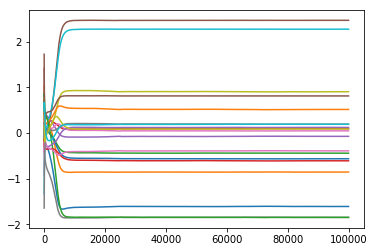

mu3


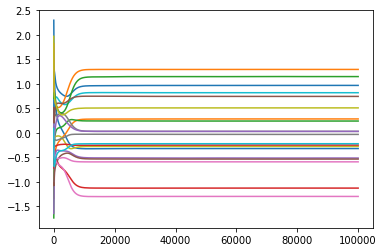

w0


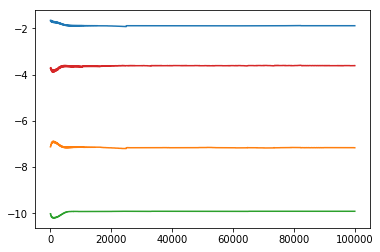

w1


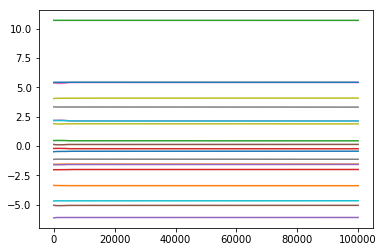

w2


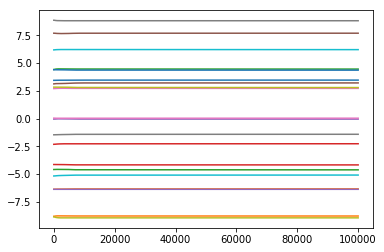

wa1


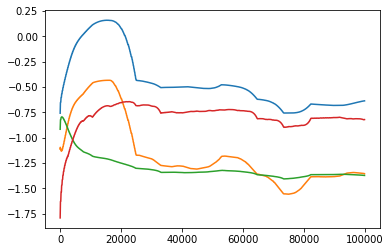

wa2


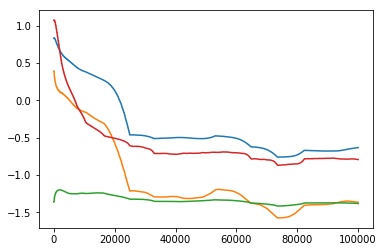

mu1grads


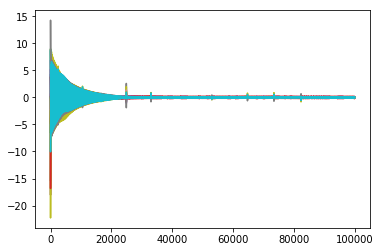

diffs1


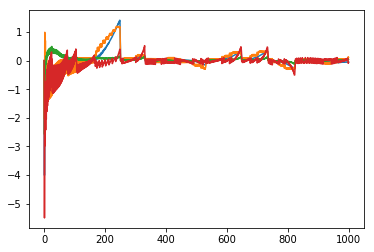

diffs2


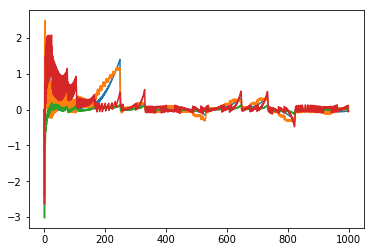

In [36]:
epochs = 1000
inf_num = 100

def reshapes(l, val):
    
    for i, e in enumerate(l):
        #print(type(e))
        #print(len(e))
        #print(e[0])
        #sh = val
        print(i)
        l[i] = np.reshape(np.array(e), (len(e),len(e[0])))
    return l

def reshape_sum_weights(l):
    for i, e in enumerate(l):
        l[i] = np.array(np.sum(e, axis=2))
    return l

def sum_of_squares(l):
    tot = 0
    for e in l:
        tot += np.sum(np.square(e))
    return tot

d1 = 20
d2 = 20

phi = [np.reshape(np.array(env.reset()), (4,1))]
mu1 = [np.random.normal(size=[d1,1])]
mu2 = [np.random.normal(size=[d2,1])]
mu3 = [np.random.normal(size=[d2,1])]
prevObs = phi[0]

ez1 = [np.random.normal(size=[4,1])]
ez2 = [np.random.normal(size=[d1,1])]
ez3 = [np.random.normal(size=[d2,1])]

p1 = 0.1
p2 = 0.1
p3 = 0.1

w0 = [np.random.normal(size=[4,d1])]
w1 = [np.random.normal(size=[d1,d2])]
w2 = [np.random.normal(size=[d2,d2])]



print(w0[0].shape)

wa1 = [np.random.normal(size=[4,1])]
wa2 = [np.random.normal(size=[4,1])]

a1 = [0]
a2 = [0]
rewards = []
rewards_per_epoch = []
actions = []
diffs1 = [np.reshape(np.array([0,0,0,0]), (4,1))]
diffs2 = [np.reshape(np.array([0,0,0,0]), (4,1))]

prior = np.reshape(np.array([0,0,0,0]), (4,1))
num_resets = 0
diffs =[0]
preds = [np.random.normal(size=[4,1])]
learning_rate = 0.0005
ds = [prior]
mu1grads = [np.reshape(np.zeros(d1), (d1,1))]

for i in range(1,epochs * inf_num):
    if i % inf_num == 0 or i == 1:
        #print("Stepping environment!")
        # run the whole shebang!
        pred = np.dot(w0[i-1], mu1[i-1])
        diffa01 = prior - (pred + wa1[i-1])
        diffa02 = prior - (pred + wa2[i-1])
        diff = np.sum(np.abs(diffa01)) - np.sum(np.abs(diffa02))
        #print(diff)
        if diff >=0:
            # a1 is best
            action = 0
            a1.append(1)
            a2.append(0)
        else:
            action = 1
            a1.append(0)
            a2.append(1)
            
        """if prevObs[2] >= 10:
            action = 1
            a1.append(1)
            a2.append(0)
        if prevObs[2] <= -10:
            action = 0
            a1.append(0)
            a2.append(1)"""
       
    
        #action = 1
        #a1.append(0)
        #a2.append(0)
        #print(str(action) + "  " + str(np.sum(diffa01)) + "   " + str(np.sum(diffa11)))
        o, r, done, info = env.step(action)
        rewards.append(r)
        env.render()
        o = np.reshape(np.array(o), (4,1)) / 3. 
        phi.append(o)
        prevObs = o
        diffs.append(diff)
        diffs1.append(o - diffa01)
        diffs2.append(o - diffa02)

        
        if done:
            #prior = np.reshape(np.array(env.reset()), (4,1))
            env.reset()
            prior = np.reshape(np.array([0,0,0,0]), (4,1))
            num_resets +=1
            rewards_per_epoch.append(np.sum(rewards))
            rewards = []
    else:
        #print(phi[i-1])
        phi.append(phi[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])
        diffs.append(diffs[i-1])
        
    """print(i)
    print(w0[i-1].shape)
    print(ez1[i].shape)
    print(ez2[i].shape)
    print(mu1[i-1].shape)
    print(mu2[i-1].shape)
    print(w1[i-1].shape)
    print(ez2[i-1].shape)
    print(ez3[i].shape)"""
    ez1.append(phi[i] - (np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i])))
    ez2.append(mu1[i-1] - np.dot(w1[i-1], mu2[i-1]))
    ez3.append(mu2[i-1] - np.dot(w2[i-1], mu3[i-1]))

   # print(phi[i])
    mu1grad = np.dot(w0[i-1].T, ez1[i]) + ez2[i]
    mu2grad = np.dot(w1[i-1].T, ez2[i]) + ez3[i]
    mu3grad = np.dot(w2[i-1].T, ez3[i])
    mu1grads.append(mu1grad)
    
    mu1.append(mu1[i-1] + (1 * learning_rate * mu1grad))
    mu2.append(mu2[i-1] + (1 * learning_rate * mu2grad))
    mu3.append(mu3[i-1] + (1 * learning_rate * mu3grad))
    
    #np.dot(wz10[i-1].T, ez00[i]) + np.dot(ww11[i-1].T, ew11[i]) + ez10[i]
    #mu11grad = np.dot(wz11[i-1].T, ez01[i]) + np.dot(ww12[i-1].T, ew12[i]) + ew11[i] + ez11[i]
    
    d = prior - o
    ds.append(d)
    pred = np.dot(w0[i-1], mu1[i-1])
    diffa01 = prior - (pred + wa1[i-1])
    diffa02 = prior - (pred + wa2[i-1])
    wa1.append(wa1[i-1] + (learning_rate * ((ez1[i] * a1[i]) + (d * a1[i]))))
    wa2.append(wa2[i-1] + (learning_rate * ((ez1[i] * a2[i]) + (d * a2[i]))))
    
    if i % inf_num == 0:
        # update weights - 
        w0.append(w0[i-1] + (10* learning_rate * np.dot(ez1[i], mu1[i].T))) 
        w1.append(w1[i-1] + (10 * learning_rate * np.dot(ez2[i], mu2[i].T)))
        w2.append(w2[i-1] + (10 * learning_rate * np.dot(ez3[i], mu3[i].T)))
        
    else:
        w0.append(w0[i-1])
        w1.append(w1[i-1])
        w2.append(w2[i-1])
        
        
    preds.append(np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]))
    
    
phi, ez1, ez2, mu1, wa1, wa2, preds,ds,mu1grads, diffs1, diffs2 = reshapes([phi, ez1, ez2, mu1,wa1, wa2, preds,ds, mu1grads, diffs1, diffs2],4)
ez3, mu2, mu3 = reshapes([ez3,mu2,mu3], d2)
w0, w1, w2 = reshape_sum_weights([w0, w1, w2])

print("NUM RESETS: " + str(num_resets))
print("Average Reward per epoch: " + str(np.mean(rewards_per_epoch)))
n  = range(epochs * inf_num )
print(n)
print(phi.shape)
print("Phi")
plt.plot(n, phi)
plt.show()
print("Pred phi")
plt.plot(n, preds)
plt.show()
print("ds")
plt.plot(n, ds)
plt.show()
print("A1")
plt.plot(n, a1)
plt.show()
print("A2")
plt.plot(n, a2)
plt.show()
print("diffs")
plt.plot(n, diffs)
plt.show()
print("ez1")
plt.plot(n, ez1)
plt.show()
print("ez2")
plt.plot(n, ez2)
plt.show()
print("ez3")
plt.plot(n, ez3)
plt.show()
print("mu1")
plt.plot(n, mu1)
plt.show()
print("mu2")
plt.plot(n, mu2)
plt.show()
print("mu3")
plt.plot(n, mu3)
plt.show()
print("w0")
plt.plot(n, w0)
plt.show()
print("w1")
plt.plot(n, w1)
plt.show()
print("w2")
plt.plot(n, w2)
plt.show()
print("wa1")
plt.plot(n, wa1)
plt.show()
print("wa2")
plt.plot(n, wa2)
plt.show()
print("mu1grads")
plt.plot(n, mu1grads)
plt.show()
print("diffs1")
#
plt.plot(diffs1)
plt.show()
print("diffs2")
plt.plot(diffs2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
NUM RESETS: 94
Average Reward per epoch: 10.574468085106384


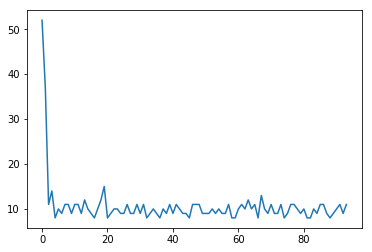

PLOTTING!
phi


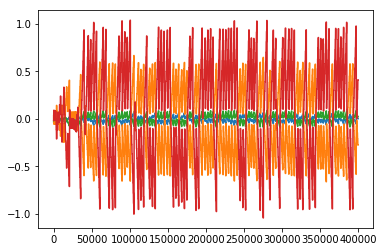

pred_phi


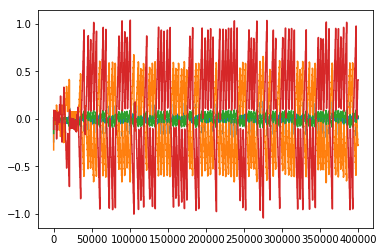

diffs


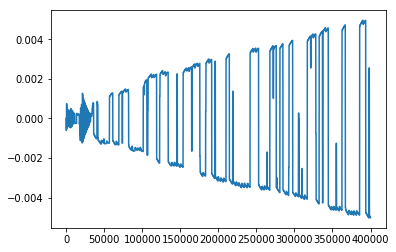

A1


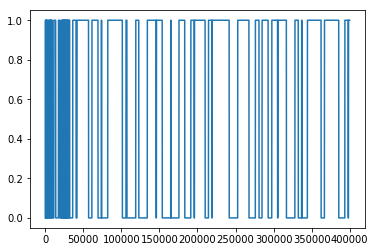

A2


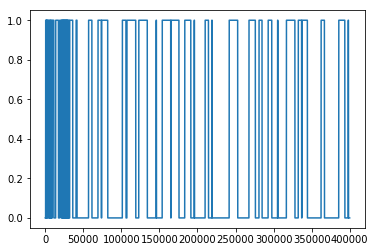

ez1


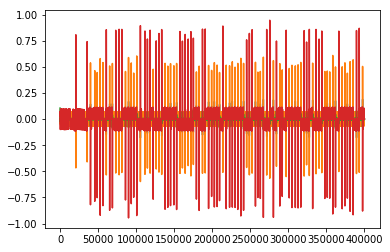

ez2


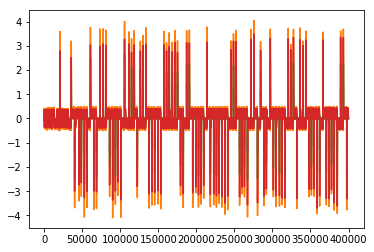

ez3


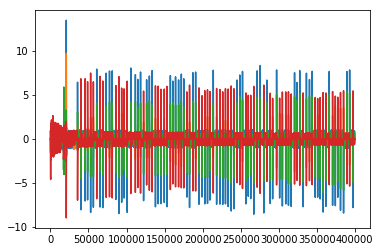

mu1


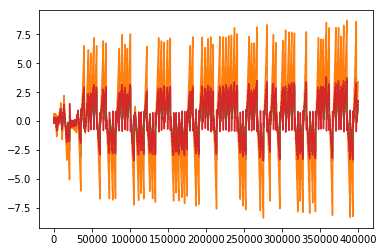

mu2


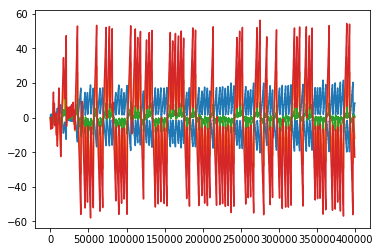

mu3


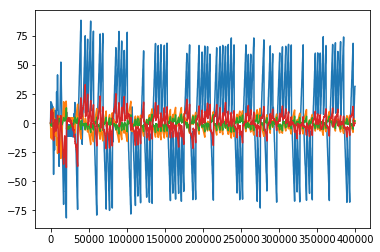

w0


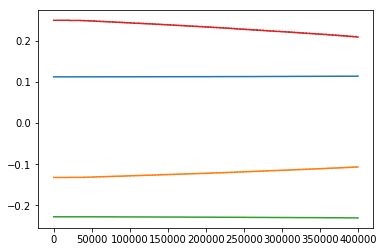

w1


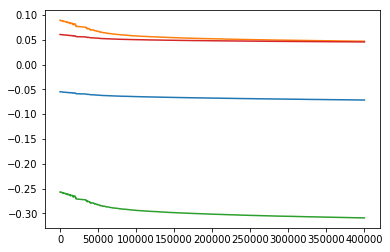

w2


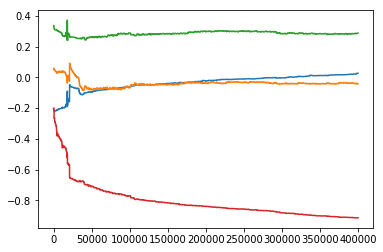

wa1


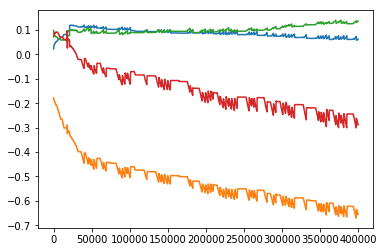

wa2


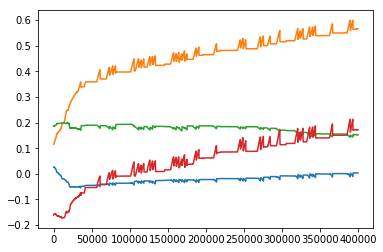

mu1grads


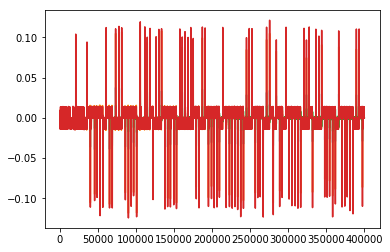

diffs1


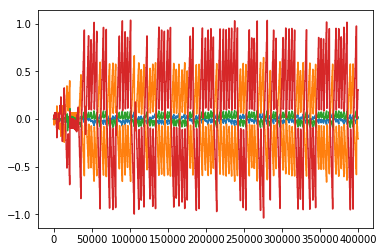

diffs2


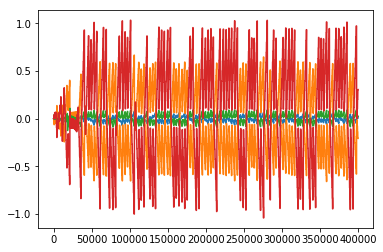

diffs


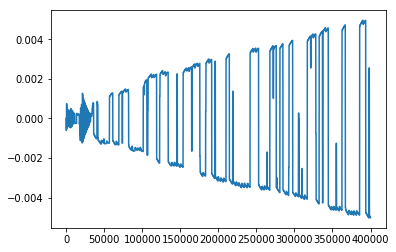

acts


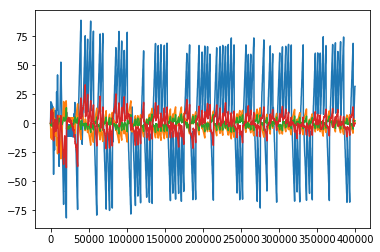

ea1


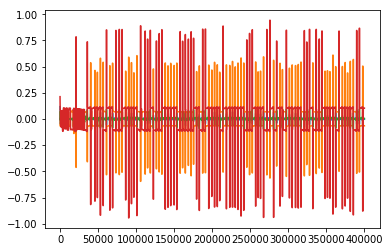

ea2


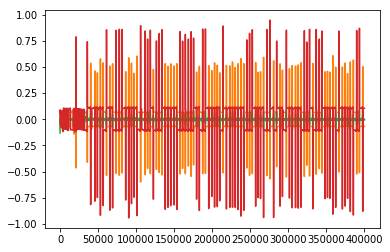

pe3a1s


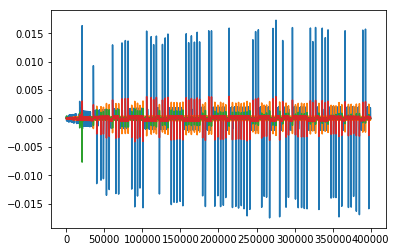

pe3a2s


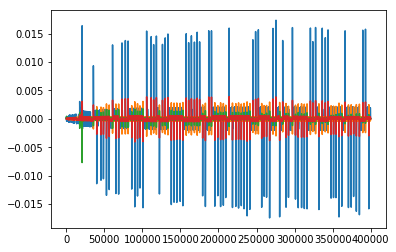

In [69]:

epochs = 1000
inf_num = 400

def reshapes(l, val):
    for i, e in enumerate(l):
        print(i)
        l[i] = np.reshape(np.array(e), (len(e), val))
    return l

def reshape_sum_weights(l):
    for i, e in enumerate(l):
        l[i] = np.array(np.sum(e, axis=2))
    return l

def sum_of_squares(l):
    tot = 0
    for e in l:
        tot += np.sum(np.square(e))
    return tot

d1 = 4
d2 = 4

phi = [np.reshape(np.array(env.reset()), (4,1))]
mu1 = [np.random.normal(scale = 0.1, size=[d1,1])]
mu2 = [np.random.normal(scale=0.1,size=[d2,1])]
mu3 = [np.random.normal(scale=0.1,size=[d2,1])]
prevObs = phi[0]

ez1 = [np.random.normal(scale=0.1,size=[4,1])]
ez2 = [np.random.normal(scale=0.1,size=[d1,1])]
ez3 = [np.random.normal(scale=0.1,size=[d2,1])]

ea1 = [np.random.normal(scale=0.1,size=[4,1])]
ea2 = [np.random.normal(scale=0.1,size=[4,1])]

w0 = [np.random.normal(scale=0.1,size=[4,d1])]
w1 = [np.random.normal(scale=0.1,size=[d1,d2])]
w2 = [np.random.normal(scale=0.1,size=[d2,d2])]

wa1 = [np.random.normal(scale=0.1,size=[4,1])]
wa2 = [np.random.normal(scale=0.1,size=[4,1])]

acts = [np.random.normal(scale=0.1,size=[d2,1])]

a1 = [0]
a2 = [0]
rewards = []
rewards_per_epoch = []
actions = []
diffs1 = [np.reshape(np.array([0,0,0,0]), (4,1))]
diffs2 = [np.reshape(np.array([0,0,0,0]), (4,1))]

prior = np.reshape(np.array([0,0,0,0]), (4,1))
num_resets = 0
diffs =[0]
preds = [np.random.normal(size=[4,1])]
learning_rate = 0.0001
ds = [prior]
mu1grads = [np.reshape(np.array([0,0,0,0]), (4,1))]

pe3a1s = [np.reshape(np.array([0,0,0,0]), (4,1))]
pe3a2s = [np.reshape(np.array([0,0,0,0]), (4,1))]

for i in range(1,epochs * inf_num):
    if i % inf_num == 0 or i == 1:
        act1 = mu3[i-1] + wa1[i-1]
        act2 = mu3[i-1] + wa2[i-1]
        mu2a1 = np.dot(w2[i-1], act1)
        mu1a1 = np.dot(w1[i-1], mu2a1)
        preda1 = np.dot(w0[i-1], mu1a1)
        mu2a2 = np.dot(w2[i-1], act2)
        mu1a2 = np.dot(w1[i-1], mu2a2)
        preda2 = np.dot(w0[i-1], mu1a2)
        diffa01 = preda1 - prior
        diffa02 = preda2 - prior
        #print("Diffa01: ", diffa01[2])
        #print("Diffa02: ", diffa02[2])
        #diff = np.sum(np.abs(diffa01) - np.sum(np.abs(diffa02))
        diff = np.abs(diffa01[2]) - np.abs(diffa02[2])
        #print("Diff: ", diff)
        if diff <=0:
            # a1 is best
            action = 0
            a1.append(1)
            a2.append(0)
        else:
            action = 1
            a1.append(0)
            a2.append(1)

        o, r, done, info = env.step(action)
        rewards.append(r)
        env.render()
        o = np.reshape(np.array(o), (4,1)) / 3. # divide by 3 for normalization purposes... for nonlinearities
        phi.append(o)
        prevObs = o
        diffs.append(diff)
        diffs1.append(diffa01)
        diffs2.append(diffa02)
        
        ea1.append(o - preda1)
        ea2.append(o - preda2)
        #print("Ea1: ", (o-preda1))
        #print("Ea2: ", (o-preda2))
        
        if done:
            env.reset()
            prior = np.reshape(np.array([0,0,0,0]), (4,1))
            num_resets +=1
            rewards_per_epoch.append(np.sum(rewards))
            rewards = []
    else:
        phi.append(phi[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])
        diffs.append(diffs[i-1])
        diffs1.append(diffs1[i-1])
        diffs2.append(diffs2[i-1])
        ea1.append(ea1[i-1])
        ea2.append(ea2[i-1])
        
    ez1.append(phi[i] - (np.dot(w0[i-1], mu1[i-1])))
    ez2.append(mu1[i-1] - np.dot(w1[i-1], mu2[i-1]))
    # define the final layer activation which includes the action variables
   # print(mu3[i-1].shape)
    #print(wa1[i-1].shape)
    acts.append(mu3[i-1] + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]))
    #print(act.shape)
    #act = np.reshape(mu3[i-1] + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]), (4,1))
    #print("\n")
    ez3.append(mu2[i-1] - np.dot(w2[i-1], acts[i]))
    
    mu1grad = np.dot(w0[i-1].T, ez1[i]) #+ ez2[i]
    mu2grad = np.dot(w1[i-1].T, ez2[i]) #+ ez3[i]
    mu3grad = np.dot(w2[i-1].T, ez3[i])
    mu1grads.append(mu1grad)
    
    mu1.append(mu1[i-1] + (100000* learning_rate * mu1grad))
    mu2.append(mu2[i-1] + (10000* learning_rate * mu2grad))
    mu3.append(mu3[i-1] + (1000* learning_rate * mu3grad))
    
    #d = prior - o
    #ds.append(d)
    #pred = np.dot(w0[i-1], mu1[i-1])
    #diffa01 = prior - (pred + wa1[i-1])
    #diffa02 = prior - (pred + wa2[i-1])
    #print(wa1[i-1].shape)
    #print(w2[i-1].shape)
    #print(ez3[i].shape)
    #print(np.dot(w2[i-1], ez3[i]).shape)
    act1 = mu3[i] + wa1[i-1]
    act2 = mu3[i] + wa2[i-1]
    mu2a1 = np.dot(w2[i-1], act1)
    mu1a1 = np.dot(w1[i-1], mu2a1)
    preda1 = np.dot(w0[i-1], mu1a1)
    mu2a2 = np.dot(w2[i-1], act2)
    mu1a2 = np.dot(w1[i-1], mu2a2)
    preda2 = np.dot(w0[i-1], mu1a2)
    diff01 = o - preda1 
    diff02 = o - preda2
    # propagate back the predictoin error!
    pe1a1 = np.dot(w0[i-1].T, diff01)
    pe2a1 = np.dot(w1[i-1].T, pe1a1)
    pe3a1 = np.dot(w2[i-1].T, pe2a1)
    pe1a2 = np.dot(w0[i-1].T, diff02)
    pe2a2 = np.dot(w1[i-1].T, pe1a2)
    pe3a2 = np.dot(w2[i-1].T, pe2a2)
    wa1.append(wa1[i-1] + (learning_rate * ((np.dot(w2[i-1], ez3[i]) * a1[i]) + (a1[i] * pe3a1))))
    wa2.append(wa2[i-1] + (learning_rate * ((np.dot(w2[i-1], ez3[i]) * a2[i]) +(a2[i] * pe3a2))))
    pe3a1s.append(pe3a1)
    pe3a2s.append(pe3a2)
    
    
    if i % inf_num == 0:
        #print(np.dot(ez1[i], mu1[i].T))
        w0.append(w0[i-1] + (1 * learning_rate * np.dot(ez1[i], mu1[i].T)))
        w1.append(w1[i-1] + (10 * learning_rate * np.dot(ez2[i], mu2[i].T)))
        w2.append(w2[i-1] + (10 * learning_rate * np.dot(ez3[i], acts[i].T)))
        
    else:
        w0.append(w0[i-1])
        w1.append(w1[i-1])
        w2.append(w2[i-1])
      
    preds.append(np.dot(w0[i-1], mu1[i-1]))
    
phi, ez1, ez2, mu1, wa1, wa2, preds,mu1grads, diffs1, diffs2, acts, ea1, ea2, pe3a1s,pe3a2s = reshapes([phi, ez1, ez2, mu1,wa1, wa2, preds, mu1grads, diffs1, diffs2,acts, ea1, ea2, pe3a1s, pe3a2s],d1)
ez3, mu2, mu3 = reshapes([ez3,mu2,mu3], d2)
w0, w1, w2 = reshape_sum_weights([w0, w1, w2])

names = ["phi", "pred_phi","diffs", "A1", "A2", "ez1", "ez2", "ez3", "mu1","mu2","mu3","w0","w1","w2","wa1","wa2","mu1grads","diffs1", "diffs2","diffs","acts", "ea1", "ea2","pe3a1s","pe3a2s"]
vals = [phi, preds, diffs,a1,a2, ez1,ez2,ez3,mu1,mu2,mu3,w0,w1,w2,wa1,wa2,mu1grads,diffs1, diffs2,diffs,acts, ea1, ea2,pe3a1s,pe3a2s]

print("NUM RESETS: " + str(num_resets))
print("Average Reward per epoch: " + str(np.mean(rewards_per_epoch)))
plt.plot(rewards_per_epoch)
plt.show()
n  = range(epochs * inf_num )
print("PLOTTING!")
for (name, val) in zip(names, vals):
    print(name)
    plt.plot(n,val)
    plt.show()
    

In [22]:
np.dot(np.array([[2,3],[4,5]]), np.array([1,2]))

array([ 8, 14])

(4, 20)
0
1
2
3
4
5
6
7
8
9
10
0
1
2
NUM RESETS: 15
Average Reward per epoch: 63.4
range(0, 100000)
(100000, 4)
Phi


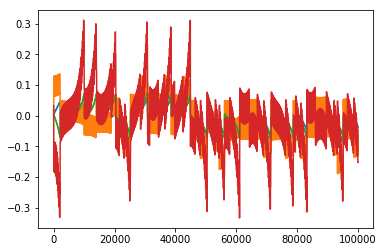

Pred phi


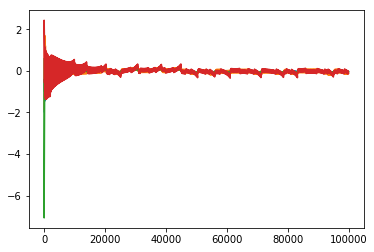

ds


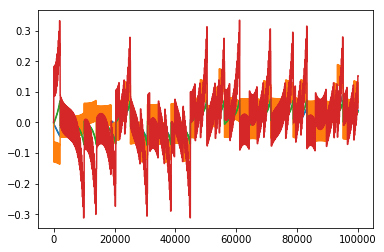

A1


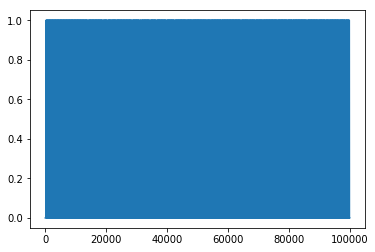

A2


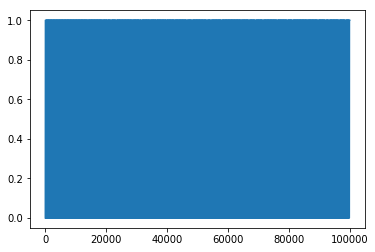

diffs


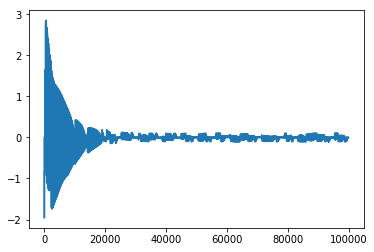

ez1


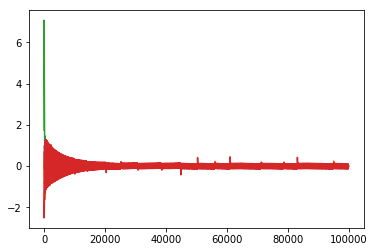

ez2


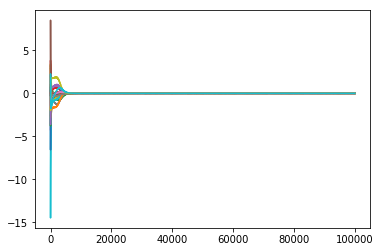

ez3


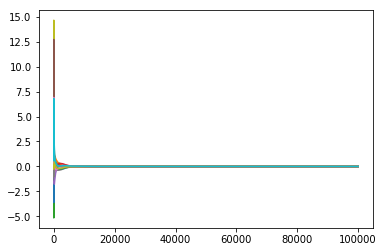

mu1


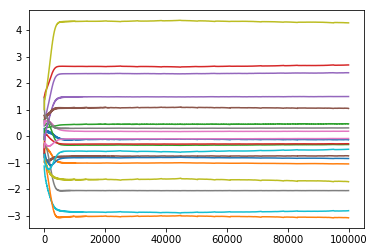

mu2


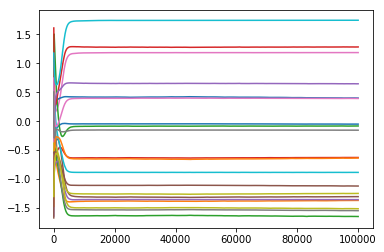

mu3


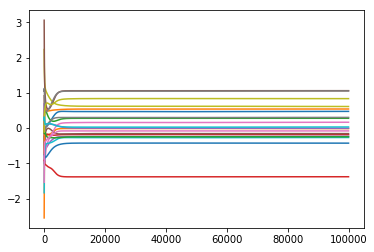

w0


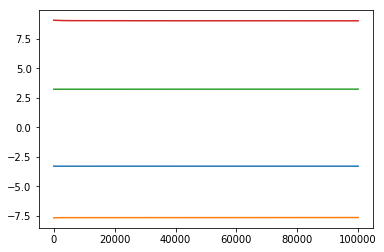

w1


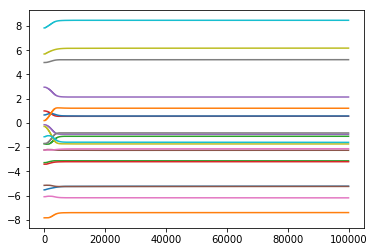

w2


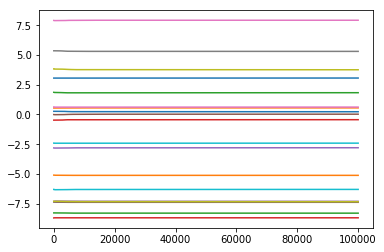

wa1


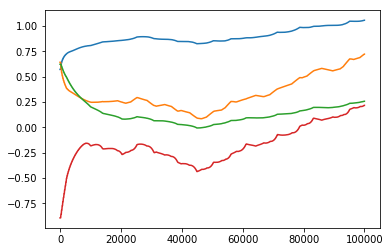

wa2


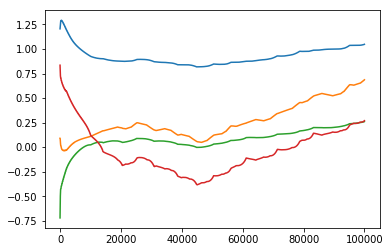

mu1grads


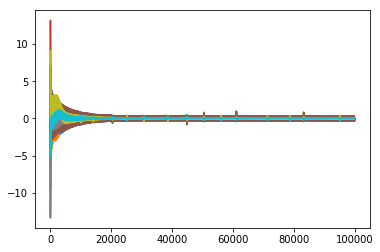

diffs1


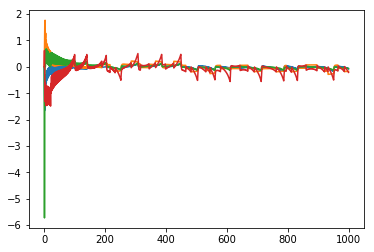

diffs2


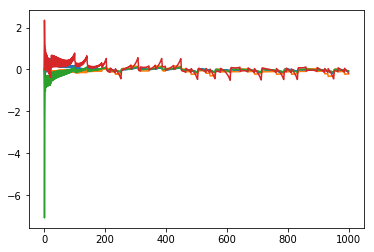

In [37]:
epochs = 1000
inf_num = 100

def reshapes(l, val):
    
    for i, e in enumerate(l):
        #print(type(e))
        #print(len(e))
        #print(e[0])
        #sh = val
        print(i)
        l[i] = np.reshape(np.array(e), (len(e),len(e[0])))
    return l

def reshape_sum_weights(l):
    for i, e in enumerate(l):
        l[i] = np.array(np.sum(e, axis=2))
    return l

def sum_of_squares(l):
    tot = 0
    for e in l:
        tot += np.sum(np.square(e))
    return tot

d1 = 20
d2 = 20

phi = [np.reshape(np.array(env.reset()), (4,1))]
mu1 = [np.random.normal(size=[d1,1])]
mu2 = [np.random.normal(size=[d2,1])]
mu3 = [np.random.normal(size=[d2,1])]
prevObs = phi[0]

ez1 = [np.random.normal(size=[4,1])]
ez2 = [np.random.normal(size=[d1,1])]
ez3 = [np.random.normal(size=[d2,1])]


p1 = 0.1
p2 = 0.1
p3 = 0.1

w0 = [np.random.normal(size=[4,d1])]
w1 = [np.random.normal(size=[d1,d2])]
w2 = [np.random.normal(size=[d2,d2])]



print(w0[0].shape)

wa1 = [np.random.normal(size=[4,1])]
wa2 = [np.random.normal(size=[4,1])]

a1 = [0]
a2 = [0]
rewards = []
rewards_per_epoch = []
actions = []
diffs1 = [np.reshape(np.array([0,0,0,0]), (4,1))]
diffs2 = [np.reshape(np.array([0,0,0,0]), (4,1))]

prior = np.reshape(np.array([0,0,0,0]), (4,1))
num_resets = 0
diffs =[0]
preds = [np.random.normal(size=[4,1])]
learning_rate = 0.0005
ds = [prior]
mu1grads = [np.reshape(np.zeros(d1), (d1,1))]

for i in range(1,epochs * inf_num):
    if i % inf_num == 0 or i == 1:
        #print("Stepping environment!")
        pred = np.dot(w0[i-1], mu1[i-1])
        diffa01 = prior - (pred + wa1[i-1]) 
        diffa02 = prior - (pred + wa2[i-1])
        diff = np.sum(np.abs(diffa01)) - np.sum(np.abs(diffa02))
        #print(diff)
        if diff >=0:
            # a1 is best
            action = 0
            a1.append(1)
            a2.append(0)
        else:
            action = 1
            a1.append(0)
            a2.append(1)
            
        """if prevObs[2] >= 10:
            action = 1
            a1.append(1)
            a2.append(0)
        if prevObs[2] <= -10:
            action = 0
            a1.append(0)
            a2.append(1)"""
    
        o, r, done, info = env.step(action)
        rewards.append(r)
        env.render()
        o = np.reshape(np.array(o), (4,1)) / 3.
        phi.append(o)
        prevObs = o
        diffs.append(diff)
        diffs1.append(o - diffa01)
        diffs2.append(o - diffa02)

        
        if done:
            env.reset()
            prior = np.reshape(np.array([0,0,0,0]), (4,1))
            num_resets +=1
            rewards_per_epoch.append(np.sum(rewards))
            rewards = []
    else:
        #print(phi[i-1])
        phi.append(phi[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])

    ez1.append(phi[i] - (np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i])))
    ez2.append(mu1[i-1] - np.dot(w1[i-1], mu2[i-1]))
    ez3.append(mu2[i-1] - np.dot(w2[i-1], mu3[i-1]))

    mu1grad = np.dot(w0[i-1].T, ez1[i]) + ez2[i]
    mu2grad = np.dot(w1[i-1].T, ez2[i]) + ez3[i]
    mu3grad = np.dot(w2[i-1].T, ez3[i])
    mu1grads.append(mu1grad)
    
    mu1.append(mu1[i-1] + (1 * learning_rate * mu1grad))
    mu2.append(mu2[i-1] + (1 * learning_rate * mu2grad))
    mu3.append(mu3[i-1] + (1 * learning_rate * mu3grad))
    
    
    d = prior - o
    ds.append(d)
    pred = np.dot(w0[i-1], mu1[i-1])
    diffa01 = prior - (pred + wa1[i-1])
    diffa02 = prior - (pred + wa2[i-1])
    wa1.append(wa1[i-1] + (learning_rate * ((ez1[i] * a1[i]) + (d * a1[i]))))
    wa2.append(wa2[i-1] + (learning_rate * ((ez1[i] * a2[i]) + (d * a2[i]))))
    
    if i % inf_num == 0:
        # update weights - 
        w0.append(w0[i-1] + (10* learning_rate * np.dot(ez1[i], mu1[i].T))) 
        w1.append(w1[i-1] + (10 * learning_rate * np.dot(ez2[i], mu2[i].T)))
        w2.append(w2[i-1] + (10 * learning_rate * np.dot(ez3[i], mu3[i].T)))
        
    else:
        w0.append(w0[i-1])
        w1.append(w1[i-1])
        w2.append(w2[i-1])
        
        
    preds.append(np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]))
    
    
phi, ez1, ez2, mu1, wa1, wa2, preds,ds,mu1grads, diffs1, diffs2 = reshapes([phi, ez1, ez2, mu1,wa1, wa2, preds,ds, mu1grads, diffs1, diffs2],4)
ez3, mu2, mu3 = reshapes([ez3,mu2,mu3], d2)
w0, w1, w2 = reshape_sum_weights([w0, w1, w2])

print("NUM RESETS: " + str(num_resets))
print("Average Reward per epoch: " + str(np.mean(rewards_per_epoch)))
n  = range(epochs * inf_num )
print(n)
print(phi.shape)
print("Phi")
plt.plot(n, phi)
plt.show()
print("Pred phi")
plt.plot(n, preds)
plt.show()
print("ds")
plt.plot(n, ds)
plt.show()
print("A1")
plt.plot(n, a1)
plt.show()
print("A2")
plt.plot(n, a2)
plt.show()
print("diffs")
plt.plot(n, diffs)
plt.show()
print("ez1")
plt.plot(n, ez1)
plt.show()
print("ez2")
plt.plot(n, ez2)
plt.show()
print("ez3")
plt.plot(n, ez3)
plt.show()
print("mu1")
plt.plot(n, mu1)
plt.show()
print("mu2")
plt.plot(n, mu2)
plt.show()
print("mu3")
plt.plot(n, mu3)
plt.show()
print("w0")
plt.plot(n, w0)
plt.show()
print("w1")
plt.plot(n, w1)
plt.show()
print("w2")
plt.plot(n, w2)
plt.show()
print("wa1")
plt.plot(n, wa1)
plt.show()
print("wa2")
plt.plot(n, wa2)
plt.show()
print("mu1grads")
plt.plot(n, mu1grads)
plt.show()
print("diffs1")
#
plt.plot(diffs1)
plt.show()
print("diffs2")
plt.plot(diffs2)
plt.show()

In [ ]:
epochs = 1000
inf_num = 100

def reshapes(l, val):
    
    for i, e in enumerate(l):
        #print(type(e))
        #print(len(e))
        #print(e[0])
        #sh = val
        print(i)
        l[i] = np.reshape(np.array(e), (len(e),len(e[0])))
    return l

def reshape_sum_weights(l):
    for i, e in enumerate(l):
        l[i] = np.array(np.sum(e, axis=2))
    return l

def sum_of_squares(l):
    tot = 0
    for e in l:
        tot += np.sum(np.square(e))
    return tot

d1 = 20
d2 = 20
scale = 1

phi = [np.reshape(np.array(env.reset()), (4,1))]
mu1 = [np.random.normal(scale=scale, size=[d1,1])]
mu2 = [np.random.normal(scale=scale,size=[d2,1])]
mu3 = [np.random.normal(scale=scale,size=[d2,1])]
prevObs = phi[0]

ez1 = [np.random.normal(scale=scale,size=[4,1])]
ez2 = [np.random.normal(scale=scale,size=[d1,1])]
ez3 = [np.random.normal(scale=scale,size=[d2,1])]


p1 = 0.1
p2 = 0.1
p3 = 0.1

w0 = [np.random.normal(scale=scale,size=[4,d1])]
w1 = [np.random.normal(scale=scale,size=[d1,d2])]
w2 = [np.random.normal(scale=scale,size=[d2,d2])]



print(w0[0].shape)

wa1 = [np.random.normal(scale=scale,size=[4,1])]
wa2 = [np.random.normal(scale=scale,size=[4,1])]

a1 = [0]
a2 = [0]
rewards = []
rewards_per_epoch = []
actions = []
diffs1 = [np.reshape(np.array([0,0,0,0]), (4,1))]
diffs2 = [np.reshape(np.array([0,0,0,0]), (4,1))]

prior = np.reshape(np.array([0,0,0,0]), (4,1))
num_resets = 0
diffs =[0]
preds = [np.random.normal(size=[4,1])]
learning_rate = 0.0005
ds = [prior]
mu1grads = [np.reshape(np.zeros(d1), (d1,1))]

for i in range(1,epochs * inf_num):
        if i % inf_num == 0 or i == 1:
        pred = np.dot(w0[i-1], mu1[i-1])
        diffa01 = prior - (pred + wa1[i-1]) 
        diffa02 = prior - (pred + wa2[i-1])
        diff = np.sum(np.abs(diffa01)) - np.sum(np.abs(diffa02))
        #print(diff)
        if diff >=0:
            # a1 is best
            action = 0
            a1.append(1)
            a2.append(0)
        else:
            action = 1
            a1.append(0)
            a2.append(1)
            
        """if prevObs[2] >= 10:
            action = 1
            a1.append(1)
            a2.append(0)
        if prevObs[2] <= -10:
            action = 0
            a1.append(0)
            a2.append(1)"""
       
        
        o, r, done, info = env.step(action)
        rewards.append(r)
        env.render()
        o = np.reshape(np.array(o), (4,1)) / 3. 
        phi.append(o)
        prevObs = o
        diffs.append(diff)
        diffs1.append(o - diffa01)
        diffs2.append(o - diffa02)

        
        if done:
            #prior = np.reshape(np.array(env.reset()), (4,1))
            env.reset()
            prior = np.reshape(np.array([0,0,0,0]), (4,1))
            num_resets +=1
            rewards_per_epoch.append(np.sum(rewards))
            rewards = []
    else:
        #print(phi[i-1])
        phi.append(phi[i-1])
        a1.append(a1[i-1])
        a2.append(a2[i-1])
        diffs.append(diffs[i-1])
        
    ez1.append(phi[i] - (np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i])))
    ez2.append(mu1[i-1] - np.dot(w1[i-1], mu2[i-1]))
    ez3.append(mu2[i-1] - np.dot(w2[i-1], mu3[i-1]))

    mu1grad = np.dot(w0[i-1].T, ez1[i]) + ez2[i]
    mu2grad = np.dot(w1[i-1].T, ez2[i]) + ez3[i]
    mu3grad = np.dot(w2[i-1].T, ez3[i])
    mu1grads.append(mu1grad)
    
    mu1.append(mu1[i-1] + (1 * learning_rate * mu1grad))
    mu2.append(mu2[i-1] + (1 * learning_rate * mu2grad))
    mu3.append(mu3[i-1] + (1 * learning_rate * mu3grad))
    
 
    d = prior - o
    ds.append(d)
    pred = np.dot(w0[i-1], mu1[i-1])
    diffa01 = prior - (pred + wa1[i-1]) 
    diffa02 = prior - (pred + wa2[i-1])
    wa1.append(wa1[i-1] + (learning_rate * ((ez1[i] * a1[i]) + (d * a1[i]))))
    wa2.append(wa2[i-1] + (learning_rate * ((ez1[i] * a2[i]) + (d * a2[i]))))
    
    if i % inf_num == 0:
        # update weights - 
        w0.append(w0[i-1] + (10* learning_rate * np.dot(ez1[i], mu1[i].T))) 
        w1.append(w1[i-1] + (10 * learning_rate * np.dot(ez2[i], mu2[i].T)))
        w2.append(w2[i-1] + (10 * learning_rate * np.dot(ez3[i], mu3[i].T)))
        
    else:
        w0.append(w0[i-1])
        w1.append(w1[i-1])
        w2.append(w2[i-1])
        
        
    preds.append(np.dot(w0[i-1], mu1[i-1]) + (wa1[i-1] * a1[i]) + (wa2[i-1] * a2[i]))
    
    
phi, ez1, ez2, mu1, wa1, wa2, preds,ds,mu1grads, diffs1, diffs2 = reshapes([phi, ez1, ez2, mu1,wa1, wa2, preds,ds, mu1grads, diffs1, diffs2],4)
ez3, mu2, mu3 = reshapes([ez3,mu2,mu3], d2)
w0, w1, w2 = reshape_sum_weights([w0, w1, w2])

print("NUM RESETS: " + str(num_resets))
print("Average Reward per epoch: " + str(np.mean(rewards_per_epoch)))
n  = range(epochs * inf_num )
print(n)
print(phi.shape)
print("Phi")
plt.plot(n, phi)
plt.show()
print("Pred phi")
plt.plot(n, preds)
plt.show()
print("ds")
plt.plot(n, ds)
plt.show()
print("A1")
plt.plot(n, a1)
plt.show()
print("A2")
plt.plot(n, a2)
plt.show()
print("diffs")
plt.plot(n, diffs)
plt.show()
print("ez1")
plt.plot(n, ez1)
plt.show()
print("ez2")
plt.plot(n, ez2)
plt.show()
print("ez3")
plt.plot(n, ez3)
plt.show()
print("mu1")
plt.plot(n, mu1)
plt.show()
print("mu2")
plt.plot(n, mu2)
plt.show()
print("mu3")
plt.plot(n, mu3)
plt.show()
print("w0")
plt.plot(n, w0)
plt.show()
print("w1")
plt.plot(n, w1)
plt.show()
print("w2")
plt.plot(n, w2)
plt.show()
print("wa1")
plt.plot(n, wa1)
plt.show()
print("wa2")
plt.plot(n, wa2)
plt.show()
print("mu1grads")
plt.plot(n, mu1grads)
plt.show()
print("diffs1")
#
plt.plot(diffs1)
plt.show()
print("diffs2")
plt.plot(diffs2)
plt.show()